### Customer Analysis project ###

We will try with available dataset to analyze the customer characteristics and create customer clusters. This will help us to design products and offer according to specific customer characteristics.
Dataset is from [Kaggle](https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis). Here is also explanation of the available columns.
- we will first analyze the dataset
    - fill or remove missing data (cleaning)
    - check and if needed remove outlier 
    - check the data relations and data distributions 

Try to Answer the questions what customers do:
    - Are there differences between older and younger customers
    - Does Marital status, or Education, or Income, or having Kid or Teen impacts the total spending, 
    - check the  relations between the data
    - try to cluster customer segments - using different clustering techniques 


In [23]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [24]:
df = pd.read_csv('marketing_campaign.csv', sep='\t')
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [5]:
df.info()
#Recency: Number of days since customer's last purchase

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [25]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [26]:
#columns which do not bring any value and could be dropped are ID, Z_Revenue, Z_CostContact 
df.drop(['ID', 'Z_Revenue', 'Z_CostContact'], inplace=True, axis=1)

In [27]:
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format ="%d-%m-%Y") #date of enrollment of customer

In [9]:
df.isna().sum()

Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Response                0
dtype: int64

### checking outliers and distributions ### 


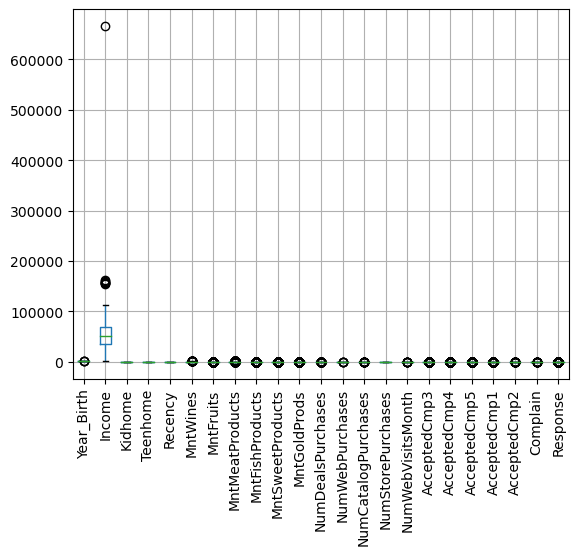

In [28]:
df.boxplot(rot=90)
plt.show()

for income remove outliers first, and remove na rows 

In [29]:
out = df[df['Income']>500000]
df.drop(out.index, inplace=True)
df = df.dropna(axis=0)


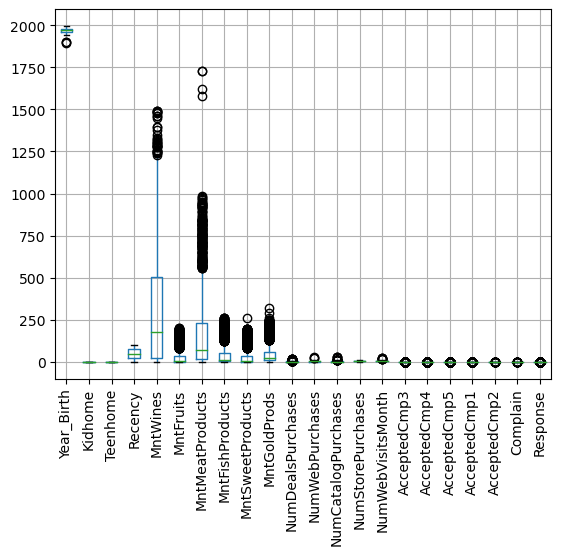

In [30]:
integers = df.select_dtypes(include='int')
integers.boxplot(rot=90)
plt.show()

In [52]:

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2211 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Year_Birth           2211 non-null   int64         
 1   Education            2211 non-null   object        
 2   Marital_Status       2211 non-null   object        
 3   Income               2211 non-null   float64       
 4   Kidhome              2211 non-null   int64         
 5   Teenhome             2211 non-null   int64         
 6   Dt_Customer          2211 non-null   datetime64[ns]
 7   Recency              2211 non-null   int64         
 8   MntWines             2211 non-null   int64         
 9   MntFruits            2211 non-null   int64         
 10  MntMeatProducts      2211 non-null   int64         
 11  MntFishProducts      2211 non-null   int64         
 12  MntSweetProducts     2211 non-null   int64         
 13  MntGoldProds         2211 non-nul

In [14]:
df.Marital_Status.value_counts()

Married     857
Together    572
Single      471
Divorced    232
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64

In [33]:
strange_status = df[(df['Marital_Status']=='Absurd') | (df['Marital_Status']=='YOLO')]

In [34]:
df.drop(strange_status.index, inplace=True)


In [35]:
df.Education.value_counts()

Graduation    1114
PhD            479
Master         364
2n Cycle       200
Basic           54
Name: Education, dtype: int64

In [36]:
#creating total spend column from  Wines, Fruits, Meat, sweet ... gold not since gold is more expensive and thus separate from commodities 
df['total_spent'] =df['MntWines'] + df['MntFruits']+ df['MntFishProducts'] + df['MntSweetProducts']

df['Marital_Status']=df['Marital_Status'].replace({'Alone':'Single','Together':'Partnership', 'Married':'Partnership'})


In [56]:
latest_date = df['Dt_Customer'].max() # check Seniority of customer 
df['customer_seniority'] = (latest_date - df['Dt_Customer']).dt.days
df['kids'] = df['Kidhome'] + df['Teenhome']

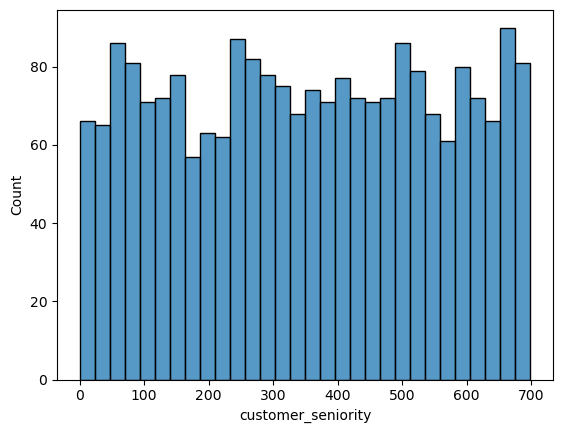

In [55]:
sns.histplot(data = df, x = 'customer_seniority', bins = 30)
plt.show()

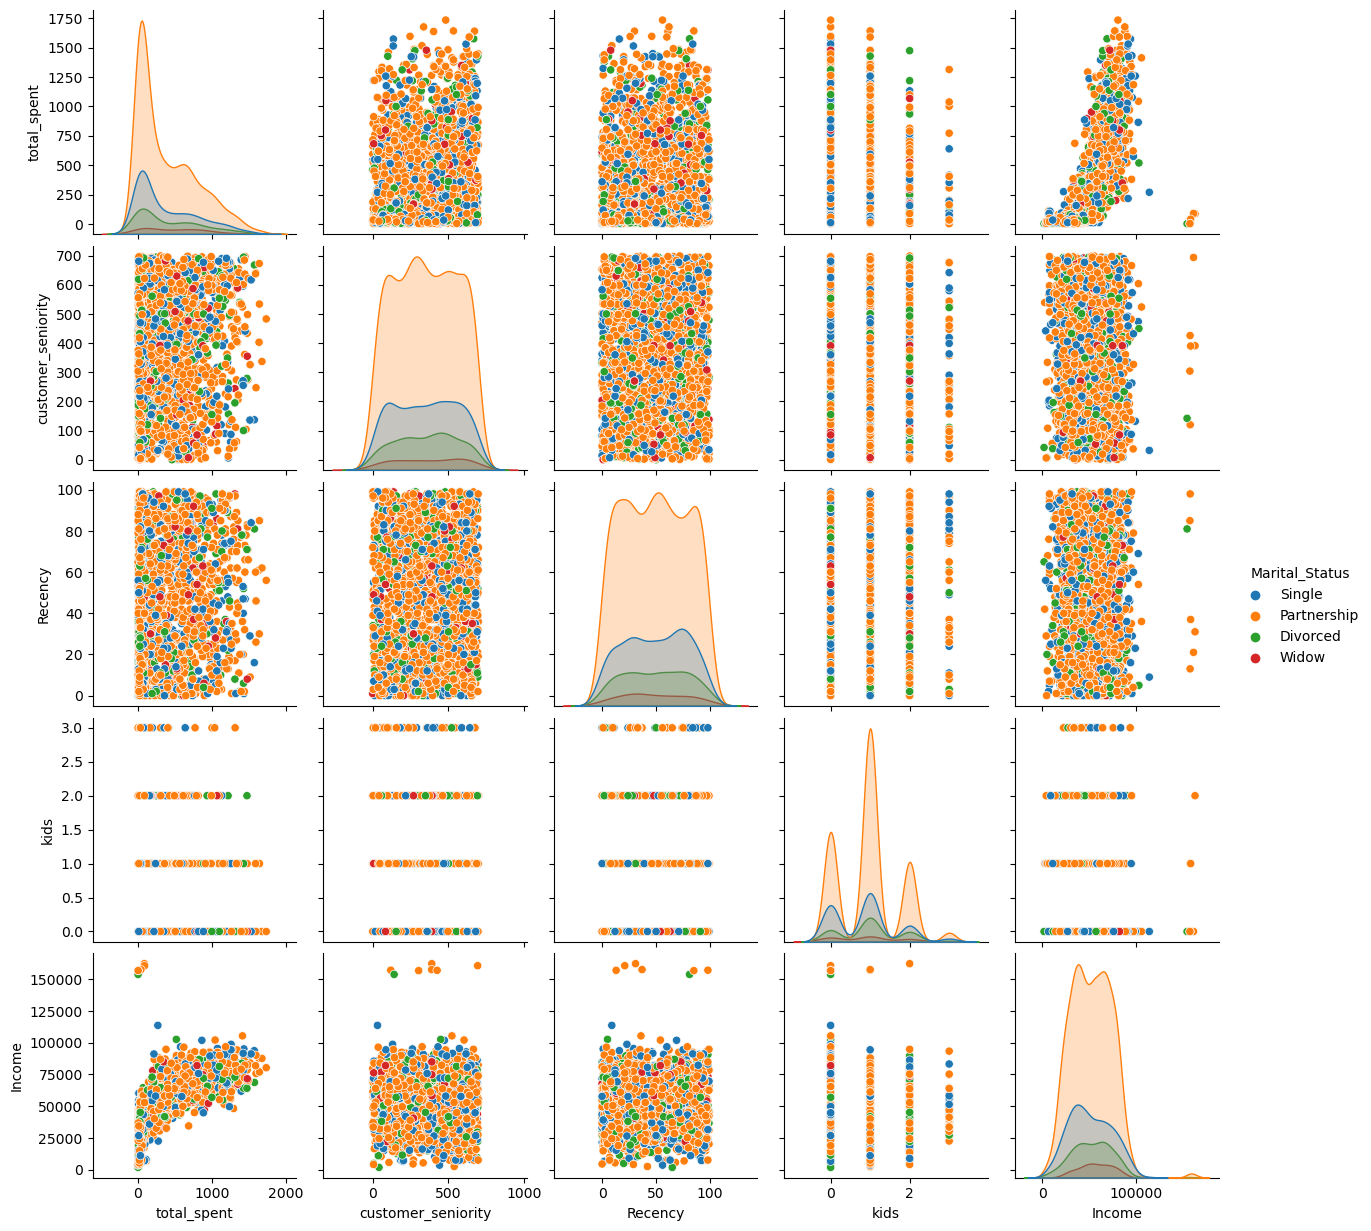

In [57]:

quant = df[['total_spent', 'customer_seniority', 'Recency', 'kids','Income', 'Marital_Status']]
sns.pairplot(quant, hue='Marital_Status')
plt.show()

#gold spending